In [5]:
%matplotlib widget

In [1]:
import pylab
from pycbc.waveform import get_td_waveform, get_fd_waveform,td_approximants,fd_approximants
import pycbc.noise
import pycbc.psd
import pycbc
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline,interp1d

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [21]:
m1 = 10
m2 = 10
d = 1000
n_timesteps = 2048

params, event, signal, noise, SNR, length = [], [], [], [], [], []

hp, hc = get_td_waveform(approximant='IMRPhenomD', # generates the time-domain strains
                 mass1=m1,
                 mass2=m2,
                 delta_t=delta_t,
                 f_lower=15,
                 distance=d)

hp.start_time+=hp.duration-hp.sample_times[-1] # shifts the event so that it starts at t=0
hp.start_time-=hp.sample_times[0] 

delta_f = 1.0 / hp.duration
flen = int(n_timesteps / delta_f) + 1

psd = pycbc.psd.analytical.AdvVirgo(flen, delta_f, flow)

# generating hp.duration seconds of noise at 4096 Hz

tsamples = int(hp.duration / delta_t)
ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=None)

# calculating SNR
tstilde = ts.to_frequencyseries()
snr = pycbc.filter.matched_filter(hp, tstilde, psd=psd,
                              low_frequency_cutoff=flow)
snr=np.abs(snr)

# resampling event so that it is composed of n_timesteps points and lasts 1 seconds
time_resampled = np.linspace(hp.duration-0.01-1,hp.duration-0.01,n_timesteps)
spl = interp1d(hp.sample_times, hp, kind='cubic')
event_resampled = spl(time_resampled)

spl = interp1d(ts.sample_times, ts, kind='cubic')
noise_resampled = spl(time_resampled)
signal_resampled = event_resampled + noise_resampled

sigma = np.std(noise_resampled) # std of the noise
SNR.append(np.abs(event_resampled).max()/sigma)

# normalising event, signal to the same max
event_resampled = event_resampled/1.0e-21
signal_resampled = signal_resampled/1.0e-21

#event.append(event_resampled/signal_resampled.max()) # event contains only the clean simulated event (only plus polarisation)
event.append(event_resampled) # event contains only the clean simulated event (only plus polarisation)

#signal.append(signal_resampled/signal_resampled.max()) # signal contains the event + noise
signal.append(signal_resampled) # signal contains the event + noise        

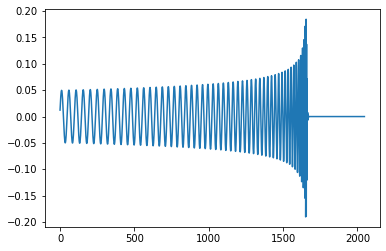

In [22]:
plt.plot(event[0])

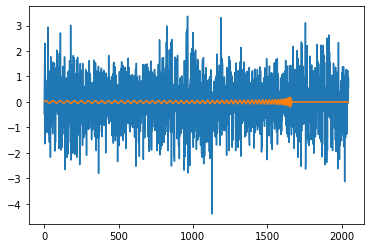

In [23]:
plt.plot(signal[0])
plt.plot(event[0])

/usr/local/lib64/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


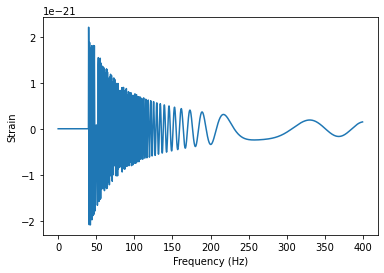

In [3]:
sptilde, sctilde = get_fd_waveform(approximant="TaylorF2",
                                             mass1=10,
                                             mass2=1,
                                             delta_f=1.0/4,
                                             f_lower=40)

# hp, hc = get_fd_waveform(approximant='TaylorF2',
#                          mass1=8,
#                          mass2=3,
#                          delta_f=1,
#                          f_lower=15,
#                          f_final=400,
#                          distance=200)

# hp.start_time+=hp.duration-hp.sample_times[-1]
# hp.start_time-=hp.sample_times[0]
# hp.resize(2000000)
fig = plt.figure()
pylab.plot(sptilde.sample_frequencies, sptilde)

pylab.ylabel('Strain')
pylab.xlabel('Frequency (Hz)')
# pylab.legend()
pylab.show()


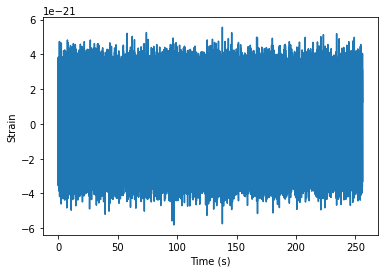

SNR =  0.01048939190829922


In [3]:
np.random.seed(2) # setting the seed for np.random.normal()

delta_t = 1/4096

hp, hc = get_td_waveform(approximant='IMRPhenomD',
                         mass1=1,
                         mass2=1,
                         delta_t=delta_t,
                         f_lower=30,
                         distance=1000)
#hp.start_time+=hp.duration-hp.sample_times[-1]
hp.start_time-=hp.sample_times[0]

delta_f = 1.0 / hp.duration
# Paramaters for noise generation
# The color of the noise matches a PSD which you provide
flow = 30.0

flen = int(2048 / delta_f) + 1 # number of timesteps in the noise 
psd = pycbc.psd.analytical.AdvVirgo(flen, delta_f, flow)
# print(psd.delta_f) 

# # Generate hp.duration seconds of noise at 4096 Hz
# hp.resize(l)

tsamples = int(hp.duration/ delta_t)
ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=None)
tstilde = ts.to_frequencyseries()
hptilde = hp.to_frequencyseries()

hptstilde = (hp+ts).to_frequencyseries()
# print(tstilde.delta_f)
# print(1/(hp.duration))
# print()
# 1/hp.duration = delta_f
# Remove the low frequency content and downsample the data to 2048Hz
# strain = resample_to_delta_t(highpass(strain, 15.0), 1.0/2048)

fig = plt.figure()
# print(len(ts))
# print(len(hp))
plt.plot(ts.sample_times, ts)
#plt.plot(hp.sample_times, hp)

plt.ylabel('Strain')
plt.xlabel('Time (s)')

# plt.xlim(12,16)
plt.show()


print('SNR = ',(np.abs(hp)).max()/np.std(ts))


In [55]:
time_resampled = np.linspace(hp.duration-4-0.01,hp.duration-0.01,6000)
spl = interp1d(hp.sample_times, hp, kind='cubic')
clean_strain = spl(time_resampled)
spl = interp1d(ts.sample_times, hp+ts, kind='cubic')
noisy_strain = spl(time_resampled)

time_resampled += -time_resampled.min()

fig = plt.figure()
plt.plot(time_resampled,noisy_strain)
plt.plot(time_resampled,clean_strain)
# plt.plot(hp.sample_times,hp)

ValueError: A value in x_new is below the interpolation range.

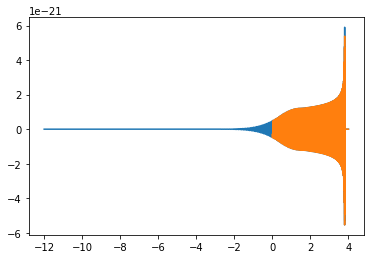

In [32]:
fig = plt.figure()

hp.start_time+=-hp.duration+4+0.01
plt.plot(hp.sample_times, hp)
plt.plot(time_resampled,clean_strain)

0.25
0.25


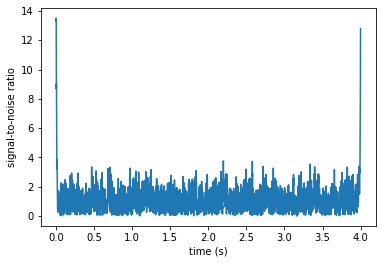

SNR =  13.509203182313197


In [98]:
print(tstilde.delta_f)
print(psd.delta_f)

template = hp
conditioned = hp+ts

psd1 = conditioned.psd(4)
psd1 = pycbc.psd.interpolate(psd1, conditioned.delta_f)
# psd1 = pycbc.psd.inverse_spectrum_truncation(psd1, 4 * conditioned.sample_rate,
#                                   low_frequency_cutoff=30)

snr = pycbc.filter.matched_filter(template, conditioned, psd=psd1,
                                      low_frequency_cutoff=flow)
snr=np.abs(snr)

plt.plot(snr.sample_times, snr)
plt.ylabel('signal-to-noise ratio')
plt.xlabel('time (s)')
plt.show()
print('SNR = ',snr.max())

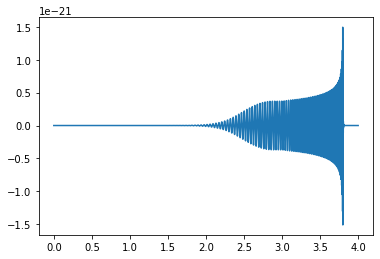

In [83]:
plt.plot(hp.sample_times,hp)

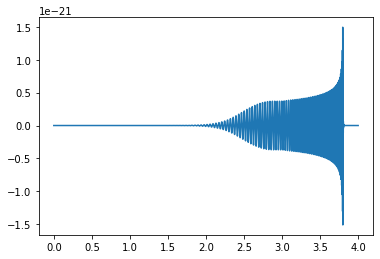

In [84]:
plt.plot(template.sample_times,template)

(6000,)

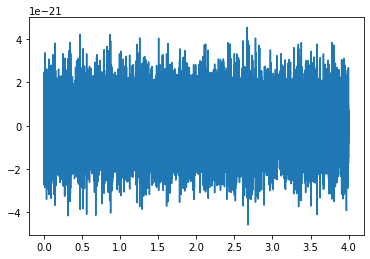

In [34]:
delta_t = 1.0 / 4096
tsamples = int(4 / delta_t)
ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=None)
tstilde = ts.to_frequencyseries()

time_resampled = np.linspace(0,ts.sample_times[-1],6000)
spl = interp1d(ts.sample_times, ts, kind='cubic')
noise_resampled = spl(time_resampled)

plt.plot(ts.sample_times,ts)
noise_resampled.shape

In [50]:
np.any(time_resampled>0.99 and time_resampled<1.01)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
print(time_resampled)

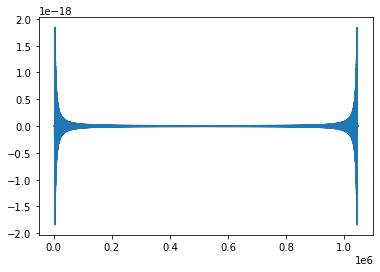

In [44]:
hp_f = np.fft.fft(np.asarray(hp))
plt.plot(np.imag(hp_f))


In [79]:
sptilde, sctilde = pycbc.waveform.get_fd_waveform(approximant="SEOBNRv4",
                               mass1=10,
                               mass2=10,
                               delta_f=1.0/32, f_lower=30.0)

print(sptilde)

RuntimeError: Internal function call failed: Generic failure

In [73]:
print(hp.sample_times)
print(np.linspace(hp.sample_times[0],hp.sample_times[-1],len(hp.sample_times)))
print(len(hp.sample_times))

[0.00000000e+00 2.44140625e-04 4.88281250e-04 ... 1.59992676e+01
 1.59995117e+01 1.59997559e+01]
[0.00000000e+00 2.44140625e-04 4.88281250e-04 ... 1.59992676e+01
 1.59995117e+01 1.59997559e+01]
65536


In [68]:
print(hp.sample_times)
print(np.linspace(hp.sample_times[0],hp.sample_times[-1],len(hp.sample_times)))
print(len(hp.sample_times))

[0.00000000e+00 2.44140625e-04 4.88281250e-04 ... 3.99926758e+00
 3.99951172e+00 3.99975586e+00]
[0.00000000e+00 2.44140625e-04 4.88281250e-04 ... 3.99926758e+00
 3.99951172e+00 3.99975586e+00]
16384


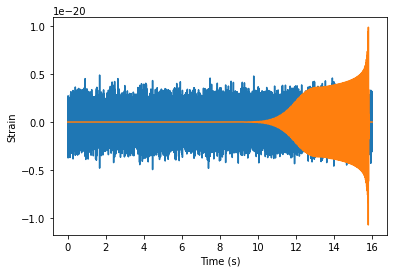

In [71]:
# The color of the noise matches a PSD which you provide
flow = 30.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
# psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
psd = pycbc.psd.analytical.AdvVirgo(flen, delta_f, flow)
# Generate 32 seconds of noise at 4096 Hz
delta_t = 1.0 / 4096
tsamples = int(hp.duration / delta_t)
ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=None)

# ts.start_time-=hp.sample_times[0]


pylab.plot(ts.sample_times, ts)
pylab.plot(hp.sample_times, hp)
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.show()

In [33]:
print(ts.sample_times[0])


0.0


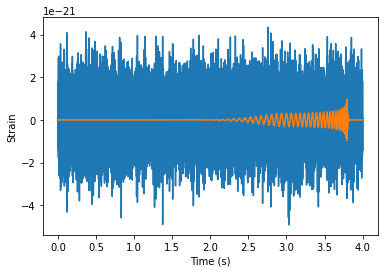

In [25]:
pylab.plot(ts.sample_times, ts+hp)
pylab.plot(hp.sample_times, hp)
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.show()

In [53]:
print(np.std(ts))
# print(np.max(hp))
print(np.abs(hp).max())

print(np.abs(hp).max()/np.std(ts))

1.1852748371765056e-21
9.679767650820664e-22
0.8166686195649996


In [9]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [52]:
m1_list = np.linspace(1,10,10)
m2_list = np.linspace(5,14,10)
print(m1_list)
print(m2_list)
params = [(x,y) for x in m1_list for y in m2_list]
i=2
m1 = params[i][0]
m2 = params[i][1]
print(m1,m2)
# m1_list = np.linspace(m1_min,m1_max,m1_num)
#     m2_list = np.linspace(m2_min,m2_max,m2_num)
#     params.append([(x,y) for x in m1_list for y in m2_list]) # contains all possible combinations of m1 and m2
#     print(params[1][0])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
1.0 7.0


In [102]:
a = np.array([0,1,2,3,4,5])
b = np.array([0,1,2,3,4,5])*2
c = np.array([0,1,2,3,4,5])*3
d = np.array([0,1,2,3,4,5])*4
e = np.vstack((a,b,c,d))
e

array([[ 0,  1,  2,  3,  4,  5],
       [ 0,  2,  4,  6,  8, 10],
       [ 0,  3,  6,  9, 12, 15],
       [ 0,  4,  8, 12, 16, 20]])

In [103]:
e = e.reshape((len(e),6))
e

array([[ 0,  1,  2,  3,  4,  5],
       [ 0,  2,  4,  6,  8, 10],
       [ 0,  3,  6,  9, 12, 15],
       [ 0,  4,  8, 12, 16, 20]])

In [104]:
np.random.shuffle(e)
e

array([[ 0,  2,  4,  6,  8, 10],
       [ 0,  4,  8, 12, 16, 20],
       [ 0,  1,  2,  3,  4,  5],
       [ 0,  3,  6,  9, 12, 15]])

In [106]:
y_train = e[:,-1] # labels (0 or 1)
y_train

array([10, 20,  5, 15])